## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how = 'inner', on = "Mouse ID", sort = 'Timepoint')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'].isin(dup_mouse_id)==False] 
study_results = study_results[study_results['Mouse ID'].isin(dup_mouse_id)==False]
# Combine the data into a single dataset
clean_data = pd.merge(mouse_metadata, study_results,how = 'inner', on = "Mouse ID", sort = 'Drug Regimen')
# Display the data table for preview
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_data.groupby('Drug Regimen')
mean_by_drug_regimen = drug_regimen['Tumor Volume (mm3)'].mean()
median_by_drug_regimen = drug_regimen['Tumor Volume (mm3)'].median()
var_drug_regimen = drug_regimen['Tumor Volume (mm3)'].var()
std_drug_regimen = drug_regimen['Tumor Volume (mm3)'].std()
sem_drug_regimen = drug_regimen['Tumor Volume (mm3)'].sem()
sem_drug_regimen 



# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary = {'Mean Tumor Volume': mean_by_drug_regimen, 'Median Tumor Volume': median_by_drug_regimen, 
              'Tumor Volume Var': var_drug_regimen, 'Tumor Volume STD': std_drug_regimen, 'Tumor Volume sem': sem_drug_regimen}
summary_df = pd.DataFrame(summary) 
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Var,Tumor Volume STD,Tumor Volume sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
indexed_df = clean_data.set_index("Drug Regimen")
indexed_df
# This method produces everything in a single groupby function
clean_data.groupby("Drug Regimen").agg(['mean','median','var', 'std', 'sem'])


Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.006757    7.5  48.251655  6.946341  0.570986  27.135135   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.933995  1.712891  0.140799  ...          52.320930   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.446266  43.852013  6.622085  0.544332         1.013514   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.224306  1.106484  0.090952  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

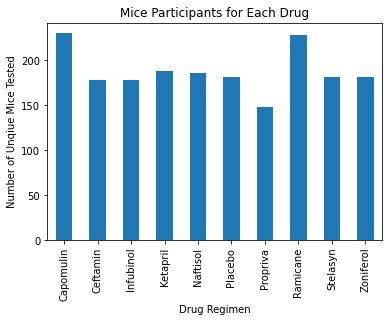

In [10]:
# Generate a bar plot showing the total number of mice
# for each treatment throughout the course of the study using pandas. 
drug_group = clean_data.groupby("Drug Regimen")
count_drug_groups = drug_group["Drug Regimen"].count()
count_drug_groups
#created bar chart from data
count_chart = count_drug_groups.plot(kind= 'bar')
#set the x and y axis
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Number of Unqiue Mice Tested')
count_chart.set_title('Mice Participants for Each Drug')
plt.show()




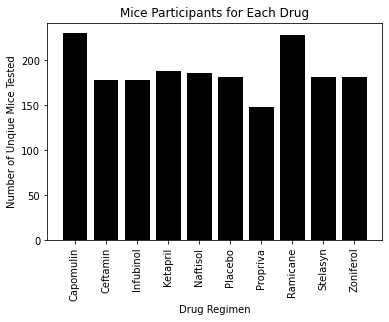

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_Regimen = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
        'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

count_drug_groups= [230,178,178,188,186,181,148,228,181,182]
#count_drug_groups

plt.bar(Drug_Regimen, count_drug_groups, color = 'k',align = 'center')
tick_locations = [value for value in Drug_Regimen]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title('Mice Participants for Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unqiue Mice Tested')
plt.show()

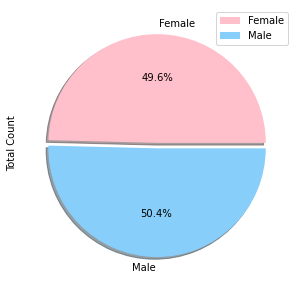

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_group = clean_data.groupby(['Mouse ID','Sex'])
sex_group

mouse_sex_df = pd.DataFrame(sex_group.size())
mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Count"]
mouse_sex["Percentage of Sex"] = (100*(mouse_sex["Total Count"]/mouse_sex["Total Count"].sum()))
mouse_sex
# Generating pie plot
colors = ['pink','lightskyblue']
explode = (0, .05)
pie_plot = mouse_sex.plot.pie(y='Total Count',figsize=(5,5), colors = colors, explode = explode, shadow = True, autopct="%1.1f%%")





([<matplotlib.patches.Wedge at 0x12302ac70>,
 [Text(0.013822671882601846, 1.0999131482721833, 'Female'),
  Text(-0.01445097514999298, -1.1499092004663736, 'Male')],
 [Text(0.007539639208691915, 0.5999526263302818, '49.6%'),
  Text(-0.008167942476082988, -0.6499486785244719, '50.4%')])

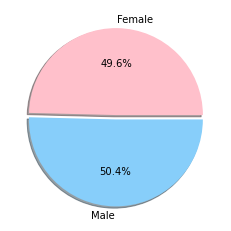

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
values = [49.6,50.4]
colors = ['pink','lightskyblue']
explode = [0,.05]
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_data= clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_data
# Start by getting the last (greatest) timepoint for each mouse
last_final_tumor_data = final_tumor_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
last_final_tumor_data.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_with_last_timepoint = pd.merge(clean_data,last_final_tumor_data,how = 'inner', on = "Mouse ID", sort = 'Timepoint')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_data.loc[clean_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1378    25.472143
1379    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 796    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


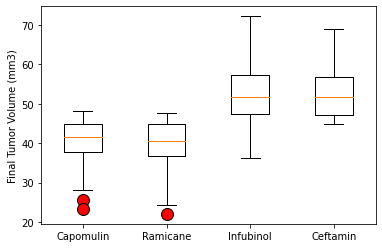

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

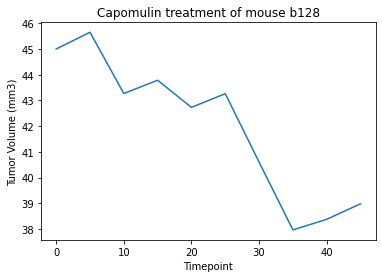

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_table
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

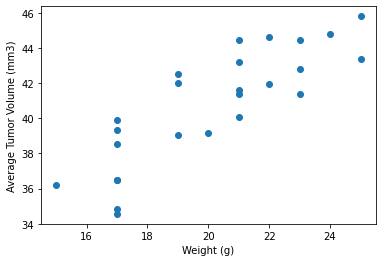

In [97]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_mean = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


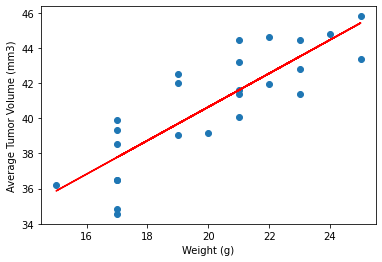

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between the two are {corr}")
model = st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])

y_values = capomulin_mean['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.plot(capomulin_mean['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()